#Reporte Hito 3
###Julio 2022
####Autores:
#####**Nicolás Felipe Gómez Pérez**
#####**Adolfo Esteban Plaza Hernández**
#####**Alejandro Daniel Valenzuela Riveros**

#Introducción
A diario ocurren cientos de miles de accidentes en todo el mundo, y Reino Unido no es la excepción. Por ejemplo, muchas veces las condiciones climáticas o la superficie de la carretera no son las óptimas para manejar adecuadamente lo que lleva a producir algún accidente, y en los peores casos una fatalidad.

El departamento de transporte del Reino Unido nos ha encargado evaluar los factores que ellos creen tienen mayor influencia en los accidentes de tráfico en el país debido a un aumento de estos durante el 2019 hasta el presente año. Tales factores como ejemplo serían el clima, las condiciones del camino y la iluminación al momento de aquellos sucesos. Esto con el objetivo de encontrar indicios acerca de qué condiciones son las que producen más accidentes en un país como Reino Unido, donde las lluvias son frecuentes y los caminos no siempre son los mejores.

En este reporte se analizarán en específico los resultados relacionados con factores externos a los accidentes, así poder asegurar cuáles de estos influyen mayormente en las casualidades que ocurren y así evitar fatalidades. Muchas veces la severidad del accidente se podría determinar por las condiciones anteriormente mencionadas, siendo importantes al momento de investigar el porqué sucedió alguna tragedia o si ha habido un aumento de estos accidentes en determinadas condiciones. Pero el principal objetivo del presente reporte es poder aplicar los factores explorados y que sean más influyentes, a un modelo experimental con el cual poder predecir la severidad de los accidentes.

En el siguiente conjunto de datos que se analizará, están registrados los accidentes automovilísticos del Reino Unido desde el año 1979 hasta el año 2015.

#Exploración de datos y preguntas

#Carga del conjunto de datos y librerías

Se cargaron los datos de kaggle https://www.kaggle.com/datasets/akshay4/road-accidents-incidence, que contienen los registros que se trabajarán.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dataframe = pd.read_csv('https://raw.githubusercontent.com/AleVZR/df/main/uk_road_acc.csv')
dataframe.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


accident_index  vehicle_reference  vehicle_type  towing_and_articulation  \
0  201506E098757                  2             9                        0   
1  201506E098766                  1             9                        0   
2  201506E098766                  2             9                        0   
3  201506E098777                  1            20                        0   
4  201506E098780                  1             9                        0   

   vehicle_manoeuvre  vehicle_location-restricted_lane  junction_location  \
0                 18                                 0                  8   
1                  9                                 0                  8   
2                 18                                 0                  8   
3                  4                                 0                  0   
4                 15                                 0                  1   

   skidding_and_overturning  hit_object_in_carriageway  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   vehicle_leaving_carriageway  ...  age_band_of_casualty  casualty_severity  \
0                            0  ...                   NaN                NaN   
1                            0  ...                   NaN                NaN   
2                            0  ...                   8.0                3.0   
3                            0  ...                   6.0                3.0   
4                            0  ...                   NaN                NaN   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                  NaN                  NaN            NaN   
1                  NaN                  NaN            NaN   
2                  0.0                  0.0            0.0   
3                  1.0                  1.0            0.0   
4                  NaN                  NaN            NaN   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                     NaN                                 NaN            NaN   
1                     NaN                                 NaN            NaN   
2                     0.0                                 0.0            9.0   
3                     0.0                                 0.0            0.0   
4                     NaN                                 NaN            NaN   

   casualty_home_area_type  casualty_imd_decile  
0                      NaN                  NaN  
1                      NaN                  NaN  
2                      1.0                  3.0  
3                      1.0                  1.0  
4                      NaN                  NaN  

[5 rows x 70 columns]

#Limpieza de dataset

Se limpiaron las variables no relevantes, aquellas que contaban con una gran cantidad de NA, vacíos o que pertenecian a categorías que representan datos no válidos o faltantes.
Lo primero que se realizó fue evaluar las variables que no coincidían con el contexto y solo se dejaron las deseadas. Se limpiaron las variables que no entregaban información valiosa para el enfoque que nos está pidiendo el departamento de transporte, también variables que fueron ingresadas erróneamente o estaban corruptas.

Variables que no coincidían con el contexto:
- journey_purpose_of_driver
- engine_capacity_(cc)
- longitude
- latitude
- 1st_road_number
- 2nd_road_number
- did_police_officer_attend_scene_of_accident
- vehicle_reference
- NUmber_of_Casualities_unique_to_accident_index
- No_ofVehicles_involved_unique_to_accident_index

Variables que la gran mayoría de registros pertenecen a categoría de "fuera de rango o que faltan los datos":
- vehicle_imd_decile
- casualty_home_area_type
- casualty_imd_decile
- driver_imd_decile
- pedestrian_road_maintenance_worker

Variables no explicativas, o que no se conoce su propósito:
- local_authority_(highway)
- lsoa_of_accident_location
- local_authority(district)
- location_easting_osgr
- location_northing_osgr

In [ ]:
df_limpieza = dataframe.copy()
df_limpieza = df_limpieza.drop(['journey_purpose_of_driver','engine_capacity_(cc)','vehicle_imd_decile','longitude','latitude','local_authority_(highway)','1st_road_number','2nd_road_number','lsoa_of_accident_location', 'casualty_home_area_type','casualty_imd_decile','driver_imd_decile','pedestrian_road_maintenance_worker','did_police_officer_attend_scene_of_accident','local_authority_(district)','vehicle_reference','NUmber_of_Casualities_unique_to_accident_index','No_of_Vehicles_involved_unique_to_accident_index','location_easting_osgr','location_northing_osgr'], axis = 1)

# Exploración de datos y preguntas

#¿Cuales fueron los años donde hubieron más cantidad de accidentes?

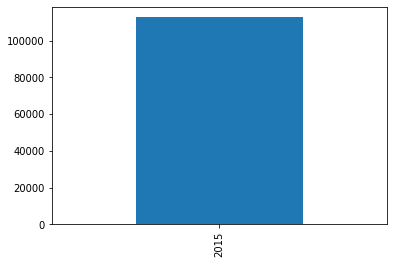

In [ ]:
df_acc_year = df_limpieza.copy()
df_acc_year['date'] = pd.to_datetime(df_limpieza['date'], errors='coerce')
df_acc_year.dropna(inplace=True)
df_acc_year['year'] = df_acc_year['date'].astype(str).str[:4]
df_acc_year['year'].value_counts().plot(kind="bar")

Luego de realizarse la limpieza de variables innecesarias en el conjunto de datos, se comenzó con la evaluación de los factores que nos encargó analizar el departamento de transporte de Reino Unido. 

Lo primero que se intentó evaluar fueron los años con más accidentes de tránsito, se trabajó la variable para darle un formato correcto separándola por día, fecha y mes. Lamentablemente, los datos en el dataframe contenían números desconocidos que no correspondían a fechas, investigando se encontraron varios comentarios en Kaggle consultando sobre el mismo problema, lamentablemente no encontramos ninguna respuesta respecto a esto, pero sospechamos una posible corrupción de los datos o quizá un código que por alguna razón no se explica en ningún lado, por lo tanto, preferimos no trabajar con esta variable.

#¿Cuál es la influencia tienen las condiciones climáticas con los accidentes?

In [ ]:
df_acc_clima = df_limpieza.copy()
df_acc_clima = df_acc_clima.mask(df_acc_clima['casualty_severity'] == -1)
df_acc_clima = df_acc_clima.dropna(subset=['casualty_severity'])

df_acc_clima_fatal = df_acc_clima.loc[df_acc_clima['casualty_severity'] == 1]
df_acc_clima_serio = df_acc_clima.loc[df_acc_clima['casualty_severity'] == 2]
df_acc_clima_ligero = df_acc_clima.loc[df_acc_clima['casualty_severity'] == 3]

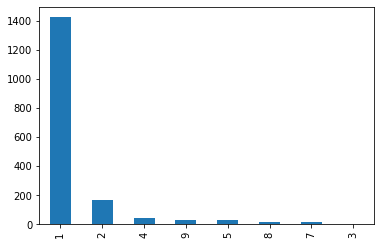

In [ ]:
df_acc_clima_fatal['weather_conditions'].value_counts().plot(kind="bar")

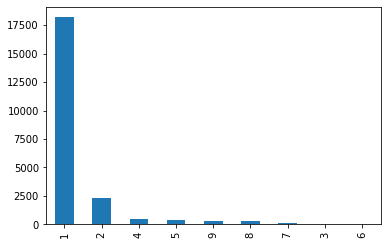

In [ ]:
df_acc_clima_serio['weather_conditions'].value_counts().plot(kind="bar")

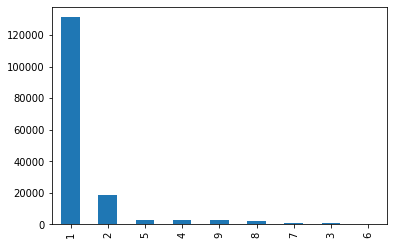

In [ ]:
df_acc_clima_ligero['weather_conditions'].value_counts().plot(kind="bar")

La segunda variable que evaluamos es la condición climática y cuál es su influencia al momento del accidente, ya que el impacto que tiene el clima en la carretera suele ser bastante para las condiciones de seguridad en el camino. Los vientos, un camino húmedo o congelado son factores que pueden llegar a ser riesgosos o incluso fatales. Sobre todo al momento de manejar y más si se hace de manera imprudente o el conductor no es alguien experimentado. 

Ante todo pronóstico, y lo que parecía ser lógico al momento de plantearse la pregunta, se pensó que los resultados arrojarían una gran cantidad de accidentes en un clima lluvioso o nevado, con o sin vientos fuertes. Pero al contrario, la mayor cantidad de accidentes leves, serios y fatales pertenecian a la categoría de clima normal y sin vientos, lo que implicó que puede haber cierta influencia del clima acerca de la cantidad de accidentes, ya que, cuando llueve o nieva, el número de casualidades disminuye significativamente[1].

#¿Cuál es la influencia de la iluminación del camino con las casualidades?

In [ ]:
df_acc_iluminacion = df_limpieza.copy()
df_acc_iluminacion = df_acc_iluminacion.mask(df_acc_iluminacion['casualty_severity'] == -1)
df_acc_iluminacion = df_acc_iluminacion.dropna(subset=['casualty_severity'])

df_acc_iluminacion_fatal = df_acc_iluminacion.loc[df_acc_iluminacion['casualty_severity'] == 1]
df_acc_iluminacion_serio = df_acc_iluminacion.loc[df_acc_iluminacion['casualty_severity'] == 2]
df_acc_iluminacion_ligero = df_acc_iluminacion.loc[df_acc_iluminacion['casualty_severity'] == 3]

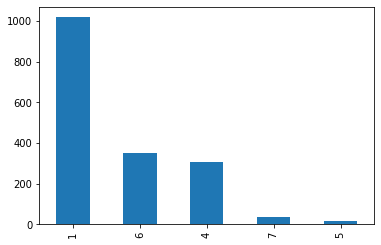

In [ ]:
df_acc_iluminacion_fatal['light_conditions'].value_counts().plot(kind="bar")

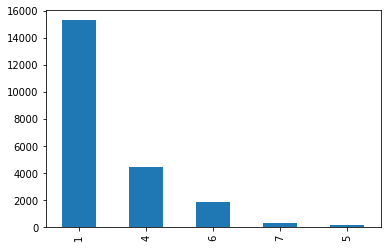

In [ ]:
df_acc_iluminacion_serio['light_conditions'].value_counts().plot(kind="bar")

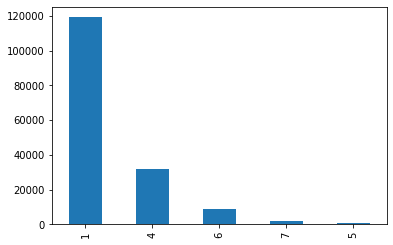

In [ ]:
df_acc_iluminacion_ligero['light_conditions'].value_counts().plot(kind="bar")

La siguiente variable que se procedió a analizar fueron las condiciones lumínicas que se reportaron el momento que ocurrió el accidente, este factor es muy importante y se piensó que puede influenciar enormemente la visibilidad. Esto debido a que se requiere una mayor concentración a la carretera por parte del conductor, lo que puede llevar a una posible fatiga o lapsus provocando un accidente, o en el peor de los casos una fatalidad.

Logramos apreciar que la cantidad de accidentes más alta se concentró en condiciones normales de luz, y en términos de proporción con las otras categorías, estas presentaron una cantidad mucho menor de casualidades.
Aun así, la proporción de accidentes fatales en condiciones de Noche y sin luz es bastante mayor a las otras categorías de severidad, indicándonos que manejar bajo estos factores es mucho más peligroso gracias al esfuerzo visual extra que debe realizar el conductor[2]. A pesar de que no se apreció una influencia muy significativa, esta variable de todas formas se tomó en cuenta para la actividad del experimento.

#¿Cuál es la influencia tiene el estado de la carretera con la gravedad de los accidentes?

In [ ]:
df_acc_calle = df_limpieza.copy()
df_acc_calle = df_acc_calle.mask(df_acc_calle['casualty_severity'] == -1)
df_acc_calle = df_acc_calle.dropna(subset=['casualty_severity'])

df_acc_calle_fatal = df_acc_calle.loc[df_acc_calle['casualty_severity'] == 1]
df_acc_calle_serio = df_acc_calle.loc[df_acc_calle['casualty_severity'] == 2]
df_acc_calle_ligero = df_acc_calle.loc[df_acc_calle['casualty_severity'] == 3]

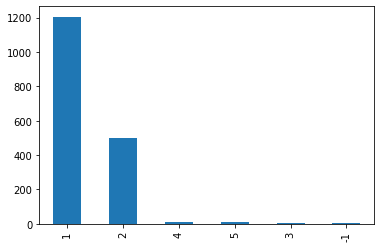

In [ ]:
df_acc_calle_fatal['road_surface_conditions'].value_counts().plot(kind="bar")

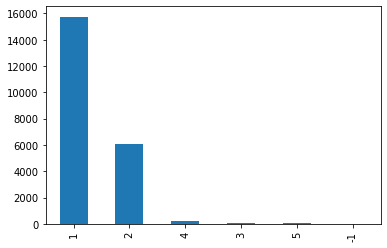

In [ ]:
df_acc_calle_serio['road_surface_conditions'].value_counts().plot(kind="bar")

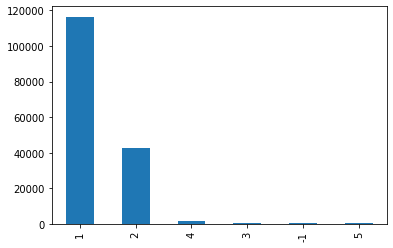

In [ ]:
df_acc_calle_ligero['road_surface_conditions'].value_counts().plot(kind="bar")

Muchas veces la condición de la superficie del camino es importante para la seguridad al momento de manejar, por eso fue el siguiente factor que evaluamos según lo asignado por el departamento. Esta variable a simple vista ya debería ser tomada en cuenta en el experimento, porque el entorno en la que se maneja es de crucial importancia para el conductor, no es lo mismo conducir en una autopista seca, mojada, congelada o en algunos casos inundada. 

Una vez fueron arrojados los resultados en los múltiples gráficos generados, se apreció que la cantidad de accidentes se concentraba en su gran mayoría en una condición seca, siendo estos casi, 140000 durante los años 1979 hasta el 2015, como segunda categoría más poblada está la condición de mojada o húmeda. 

#¿Que influencia tiene que un accidente ocurra en un área Urbana o Rural?

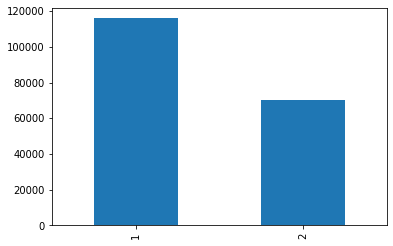

In [ ]:
df_acc_urb_rural = df_limpieza.copy()
df_acc_urb_rural = df_acc_urb_rural.mask(df_acc_urb_rural['casualty_severity'] == -1)
df_acc_urb_rural = df_acc_urb_rural.dropna(subset=['casualty_severity'])

df_acc_urb_rural['urban_or_rural_area'].value_counts().plot(kind="bar")

In [ ]:
df_acc_urb_rural_fatal = df_acc_calle.loc[df_acc_calle['casualty_severity'] == 1]
df_acc_urb_rural_serio = df_acc_calle.loc[df_acc_calle['casualty_severity'] == 2]
df_acc_urb_rural_ligero = df_acc_calle.loc[df_acc_calle['casualty_severity'] == 3]

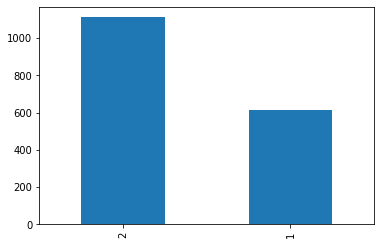

In [ ]:
df_acc_urb_rural_fatal['urban_or_rural_area'].value_counts().plot(kind="bar")

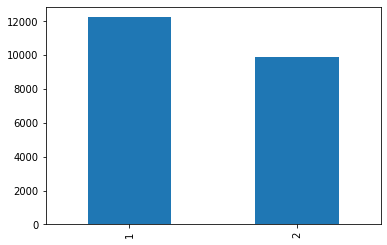

In [ ]:
df_acc_urb_rural_serio['urban_or_rural_area'].value_counts().plot(kind="bar")

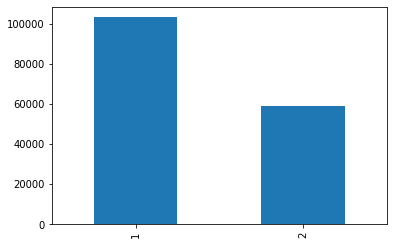

In [ ]:
df_acc_urb_rural_ligero['urban_or_rural_area'].value_counts().plot(kind="bar")

Luego de haber evaluado las condiciones más directas que pueden presentar cierta influencia y que pueda provocar una casualidad, se analizó una variable que designa en que tipo de área ocurrió el accidente, esta puede ser un área urbana o rural. Como sabemos, el área urbana es mucho más poblada que áreas rurales por obvias razones. Un reporte del gobierno de Inglaterra indica que en el año 2019 un 82.9% de la población vive en áreas urbanas, y solo un 17,1% lo hace en áreas rurales[3].

Como esperabamos, luego de ver los resultados, logramos apreciar que los accidentes en un área urbana son mucho mayores, esto por la proporcionalidad de población en áreas urbanas en comparación a áreas rurales, este factor de densidad demográfica es lo que influencia una mayor cantidad de accidentes[4]. Por lo que nos llevó a decir que esta variable es muy importante para el experimento.

#¿Cual es la influencia que tienen los días de la semana con la cantidad de accidentes?

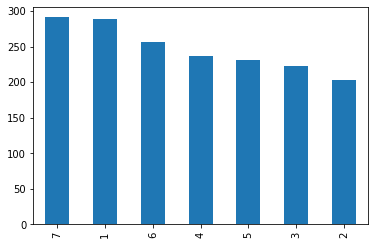

In [ ]:
df_acc_semana = df_limpieza.copy()
df_acc_semana = df_acc_semana.mask(df_acc_semana['casualty_severity'] == -1)
df_acc_semana = df_acc_semana.dropna(subset=['casualty_severity'])

df_acc_semana_fatal = df_acc_semana.loc[df_acc_semana['casualty_severity'] == 1]
df_acc_semana_serio = df_acc_semana.loc[df_acc_semana['casualty_severity'] == 2]
df_acc_semana_ligero = df_acc_semana.loc[df_acc_semana['casualty_severity'] == 3]

df_acc_semana_fatal['day_of_week'].value_counts().plot(kind="bar")

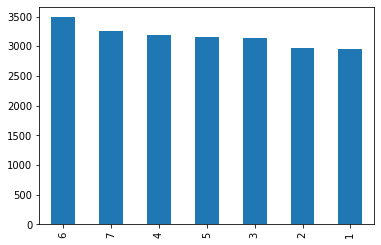

In [ ]:
df_acc_semana_serio['day_of_week'].value_counts().plot(kind="bar")

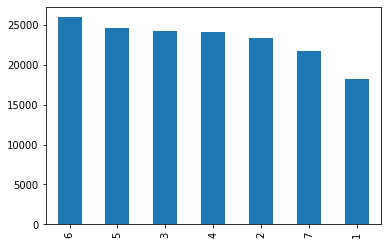

In [ ]:
df_acc_semana_ligero['day_of_week'].value_counts().plot(kind="bar")

La última variable que se nos encargó evaluar, fue la cantidad de accidentes dependiendo del día de la semana. Logramos apreciar en los resultados, que los días viernes ocurren una mayor cantidad de accidentes leves y serios, pero en cuanto a fatalidades, estas se concentran mayormente los días sábados y domingos.

Esto podia sugerir que es más peligroso conducir los fines de semana[5], pero no logramos concluir cuáles son las razones, pero sí que es clara la influencia del día de la semana con la cantidad de accidentes según lo entregado por los gráficos.

# Preguntas a responder con los experimentos

1.- ¿De que manera podemos explicar la severidad del accidente? Queremos usar las variables analizadas en el EDA para analizar y clasificar accidentes pasados.

2.-¿De que manera podemos agrupar la variable que mas influye en los accidentes con la severidad de este? Queremos usar solo dos variables analizadas en el EDA para realizar la agrupación.

# Propuesta Experimental 1

- En el dataset existen accidentes de transito que no poseen la severidad de este, por lo que se pre-procesan los datos para limpiar aquellos registros.
- Crearemos a partir de los datos un árbol de decisión para poder comprender que condiciones influenciaron en la gravedad del accidente.
- Para evaluar la calidad de la clasificacion tomaremos en cuenta metricas como precision, recall y f1-score, para finalmente utilizar accuracy.
- Se creara una tabla con un **"Top 5"** para ver que atributos afectan más y cuales afectan menos para poder interpretar los resultados de forma más sencilla.

# Experimento 1

Inicialmente el dataframe es creado a partir de una copia del dataframe que limpiamos anteriormente, al igual de que eliminamos todos los datos que no poseen una categoria real dentro de este dataframe, todo esto en el siguiente codigo.

In [ ]:
df_experimento = df_limpieza.copy()
df_experimento = df_experimento.mask(df_experimento['casualty_severity'] == -1)
df_experimento = df_experimento.dropna(subset=['casualty_severity'])

Una vez realizado lo anterior continuamos asignando que variable queremos predecir, en este experimento es **"casualty_severity"**, además de tomar las otras variables que deseamos utilizar para crear el modelo.

In [ ]:
TargetVariable='casualty_severity'
Predictors=['weather_conditions','light_conditions','road_surface_conditions','urban_or_rural_area','day_of_week']
X = df_experimento[Predictors].values
y = df_experimento[TargetVariable].values

Creamos los sets de entrenamiento y los que seran utilizados para el test del modelo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 1)

Ahora creamos e imprimimos los parametros del arbol de decisión.

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 5,random_state = 0)
print(clf)

DecisionTreeClassifier(max_depth=5, random_state=0)


Creamos el modelo y medimos el **"Accuracy"** de este.

In [ ]:
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

from sklearn import metrics

print('Reporte de clasificación: \n', metrics.classification_report(y_test, prediction))
print('Matriz de confusión: \n', metrics.confusion_matrix(y_test, prediction))

Reporte de clasificación: 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       523
         2.0       0.00      0.00      0.00      6601
         3.0       0.87      1.00      0.93     48698

    accuracy                           0.87     55822
   macro avg       0.29      0.33      0.31     55822
weighted avg       0.76      0.87      0.81     55822

Matriz de confusión: 
 [[    0     0   523]
 [    1     0  6600]
 [    1    11 48686]]


Creamos una tabla donde observamos un Top 5 con las 5 variables para ver que tanto afectan dentro del árbol de decisión para poder crear posibles explicaciones de que puede ser lo que expliquen los accidentes que ocurren en general o a que debemos tomar más atención para prevenir los accidentes o minimizar los impactos de los mismos.

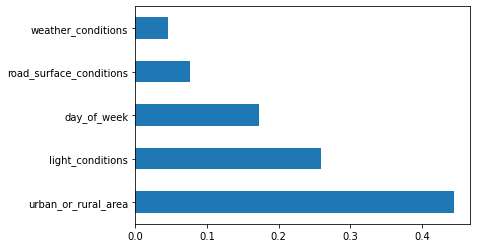

In [ ]:
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(5).plot(kind='barh')

Por ultimo imprimimos los valores ejemplo de la medición.

In [ ]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

weather_conditions  light_conditions  road_surface_conditions  \
0                   1                 1                        1   
1                   2                 1                        2   
2                   1                 1                        1   
3                   1                 1                        1   
4                   1                 1                        1   

   urban_or_rural_area  day_of_week  TargetColumn  Prediction  
0                    1            7           3.0         3.0  
1                    1            7           3.0         3.0  
2                    2            2           3.0         3.0  
3                    2            3           3.0         3.0  
4                    2            7           3.0         3.0

Al leer los datos realizamos una revisión de los datos para ver porque los resultados se encuentran tan desbalanceados

In [ ]:
df_experimento.casualty_severity.value_counts()

3.0    162209
2.0     22134
1.0      1729
Name: casualty_severity, dtype: int64

Es ahí que nosotros vimos la gran cantidad de datos dirigidos al resultado de accidentes de gravedad "Ligera", por lo que comenzamos a realizar lo siguiente:

In [ ]:
# Primero separamos las clases
df_minority = df_experimento[df_experimento.casualty_severity==1]
df_middle = df_experimento[df_experimento.casualty_severity==2]
df_majority = df_experimento[df_experimento.casualty_severity==3]

In [ ]:
from sklearn.utils import resample

# Downsample a la clase con más datos
df_majority_downsampled = resample(df_majority, 
                                 replace=False,
                                 n_samples=22134,
                                 random_state=123)

# Upsample a la clase con menos datos
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=22134,
                                 random_state=123)

# Combinamos las clases
df_exp = pd.concat([df_majority_downsampled, df_middle, df_minority_upsampled])

# Mostramos las nuevas cantidades
df_exp.casualty_severity.value_counts()

3.0    22134
2.0    22134
1.0    22134
Name: casualty_severity, dtype: int64

Realizamos un Downsample y Upsample para hacer que las gravedades que deseamos predecir tengan una misma cantidad de resultados, así permitiendo al modelo realizar mejores predicciones.

In [ ]:
#Separamos la variable a predecir y las variables que afectan a esta
TargetVariable='casualty_severity'
Predictors=['weather_conditions','light_conditions','road_surface_conditions','urban_or_rural_area','day_of_week']
X = df_exp[Predictors].values
y = df_exp[TargetVariable].values

#Separamos los datos en sets de entrenamiento y de testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

DecisionTreeClassifier(random_state=1)
Reporte de clasificación: 
               precision    recall  f1-score   support

         1.0       0.49      0.67      0.56      6581
         2.0       0.37      0.17      0.24      6540
         3.0       0.45      0.52      0.48      6800

    accuracy                           0.45     19921
   macro avg       0.44      0.45      0.43     19921
weighted avg       0.44      0.45      0.43     19921

Matriz de confusión: 
 [[4404  765 1412]
 [2481 1131 2928]
 [2156 1127 3517]]

 [1. 2. 3.]


weather_conditions  light_conditions  road_surface_conditions  \
0                   1                 1                        1   
1                   1                 4                        2   
2                   1                 1                        1   
3                   1                 1                        1   
4                   1                 1                        1   

   urban_or_rural_area  day_of_week  TargetColumn  Prediction  
0                    1            1           2.0         3.0  
1                    1            6           3.0         2.0  
2                    1            1           1.0         3.0  
3                    1            1           3.0         3.0  
4                    2            1           2.0         1.0

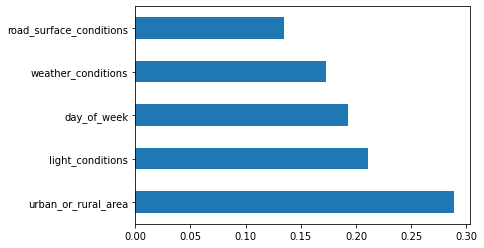

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state = 1)

#Se imprimen todos los parametros del arbol de decisión
print(clf)

#Se crea el modelo
DTree = clf.fit(X_train, y_train)
prediction = DTree.predict(X_test)

#Se mide el "accuaracy" del modelo
from sklearn import metrics
print('Reporte de clasificación: \n', metrics.classification_report(y_test, prediction))
print('Matriz de confusión: \n', metrics.confusion_matrix(y_test, prediction))
print('\n', np.unique(prediction))

#Se ve un Top 5 usando las 5 variables del modelo para medir cual es la mas importante de estas
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(5).plot(kind='barh')

#Se imprimen valores ejemplo de la medición
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

Como se puede ver el modelo si realiza mejores predicciones con un accuracy de 45%, lo cual considerando el contexto de la problematica y la naturaleza de los accidentes de transito es una predicción bastante buena.

#Propuesta Experimental 2

- Se filtran los datos para poder trabajar especificamente con la variable que presenta mayor influencia en la clasificacion propuesta en el experimento 1 y la severidad de los accidentes.
- Se utilizara K-means para conseguir agrupar los datos y visualizar los resultados.

#Experimento 2

Primero se limpian el conjunto de datos con las variables que vamos a trabajar, en este caso lo haremos con las condiciones luminicas y el tipo de area donde ocurrio el accidente.

In [ ]:
df_experimento_2 = df_limpieza.filter(['light_conditions','urban_or_rural_area'], axis=1)
X = df_experimento_2
X.head()

light_conditions  urban_or_rural_area
0                 1                    1
1                 1                    1
2                 1                    1
3                 1                    1
4                 1                    1

Se realiza la implementación del método del codo, para poder apreciar la cantidad mas correcta con la que trabajar.

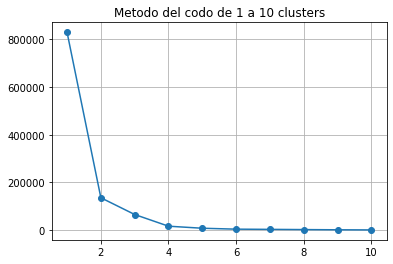

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

sse = []

clusters = list(range(1, 11))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 10 clusters")
plt.grid(True)
plt.show()

En el gráfico anterior se puede apreciar que la cantidad correcta aproximada de clusters es 2, si agregamos más centroides es posible afectar negativamente los resultados. Luego de esto entrenamos el algoritmo K-means.

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [ ]:
from sklearn.decomposition import PCA
new_X = PCA(n_components=2, random_state=0).fit_transform(X)

Ahora graficamos para apreciar el enfoque visual de los posibles clusters generados.

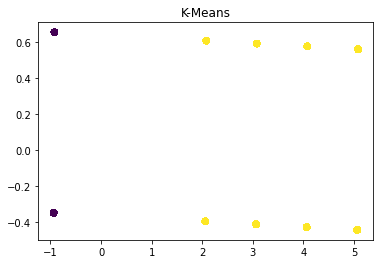

In [ ]:
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

#Resultados Relevantes
**1.- ¿De qué manera podemos explicar la severidad del accidente? Queremos usar las variables analizadas en el EDA para analizar y clasificar accidentes pasados.**

Viendo el experimento realizado se notó que la variable que más explica la severidad de los accidentes es si el accidente fue realizado en un area urbana o rural, aún así no es que solo 1 variable explique todo el fenomeno que es un accidente, claramente cada variable es importante. 
También obtuvimos una predicción con un acierto del 45% para las distintas gravedades de los accidentes, en el caso del contexto donde los accidentes de transito son un hecho caótico difícil de predecir esto nos permitió entregar una lista de condiciones al departamento de los accidentes que ocurrieron en el pasado, por lo que el departamento puede tener un mejor entendimiento de que es lo que provocó la gravedad de los accidentes y de que forma ocurrió.

**2.- ¿De que manera podemos agrupar la variable que mas influye en los accidentes con la severidad de este? Queremos usar solo dos variables analizadas en el EDA para realizar la agrupación**

Apreciando lo entregado en la propuesta de clustering y usando las variables que más influyeron en el primer experimento. No se llegó a resultados que entregaran algún tipo de información para el análisis de los factores, solo podemos concluir que utilizar agrupación para este conjunto de datos no es correcto. No se formaron los clusters exitosamente y su enfoque visual es confuso.
El equipo quiere aclarar que a pesar de que se sabía que el clustering no funcionaria correctamente, el departamento de transporte nos exigió emplear al menos 3 tipos de algoritmos para los experimentos, aunque el resultado no fuera exitoso o informativo para el proyecto.

# Referencias

[1] Davies, J. (2017). *Analysis of weather effects on daily road accidents*. Great Britain: Office for National Statistics.

URL:https://gss.civilservice.gov.uk/wp-content/uploads/2017/01/Road-accidents.pdf

[2] Uttley, J. y Fotios, S. (2017). *The eﬀect of ambient light condition on road traﬃc collisions involving pedestrians on pedestrian crossings*. United Kingdom: University of Sheffield.

URL:https://www.researchgate.net/publication/319769084_The_effect_of_ambient_light_condition_on_road_traffic_collisions_involving_pedestrians_on_pedestrian_crossings

[3] Department for Environment, Food and Rural Affairs (2021). *Statistical Digest of Rural England*. England.

URL:https://www.gov.uk/government/publications/trend-deck-2021-urbanisation/trend-deck-2021-urbanisation#:~:text=In%202019%2C%2056.3%20million%20people,in%20rural%20areas%20(17.1%25).

[4] Department for Transport (2015). *Facts on Road Fatalities*. United Kingdom.

URL:https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/448037/road-fatalities-2013-data.pdf

[5] Daily Mail (2017). *How Fridays are the most common day of the week to have an accident*. Great Britain.

URL:https://www.dailymail.co.uk/news/article-4780444/Fridays-common-day-car-accident.html

# Aportes

- Limpieza de los datos: Nicolás Gómez.
- Organización de los datos: Adolfo Plaza.
- Gráficos: Alejandro Valenzuela, Nicolás Gómez.
- Redacción de análisis: Adolfo Plaza y Nicolás Gómez.
- Revisión de redacción: Alejandro Valenzuela.
- Formulación de preguntas: Nicolás gómez y Adolfo Plaza
- Elaboración del apoyo visual de la presentación: Alejandro Valenzuela, Nicolás gómez y Adolfo Plaza.


#Links

https://gitlab.com/adolfo_plaza/proyecto_ingdatos